## DBC - Commodities

In [1]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import numpy as np
import seaborn as sns
import os

In [2]:
ticker = 'GLD'

In [3]:
start='2007-01-01'
end='2019-08-21'


In [4]:
financial_data = web.DataReader(ticker, 'yahoo', start, end)

## Vizualizating

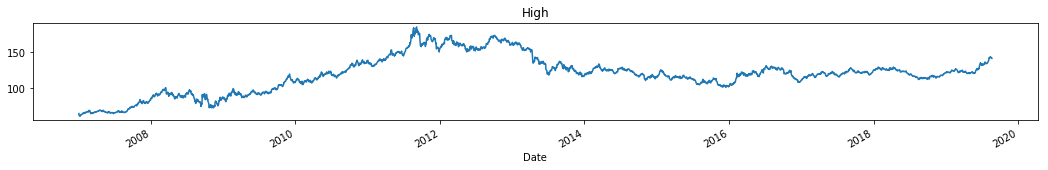

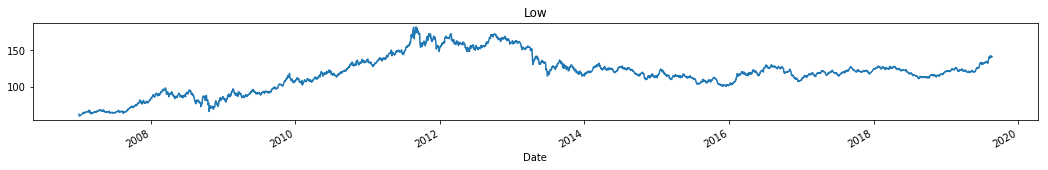

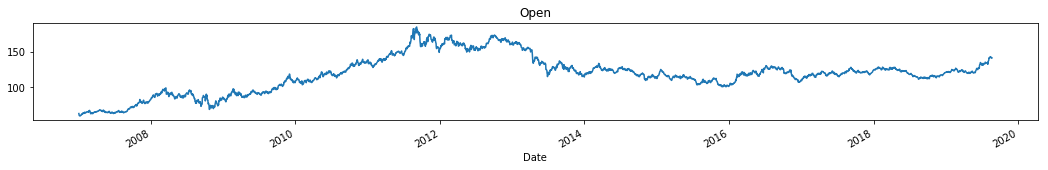

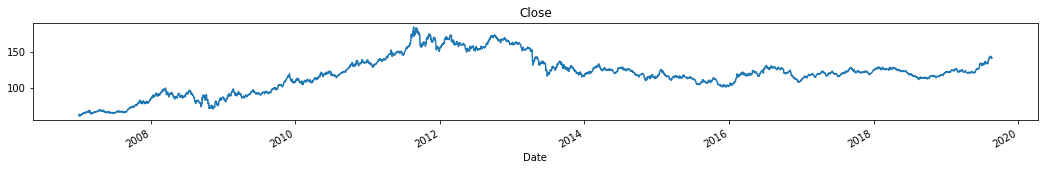

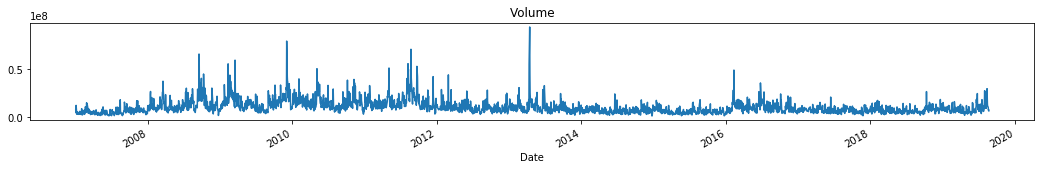

In [5]:
for col in financial_data.columns[:5]:
    plt.figure(figsize=(18,2))
    plt.title(col)
    financial_data[col].plot()


## Rolling Mean

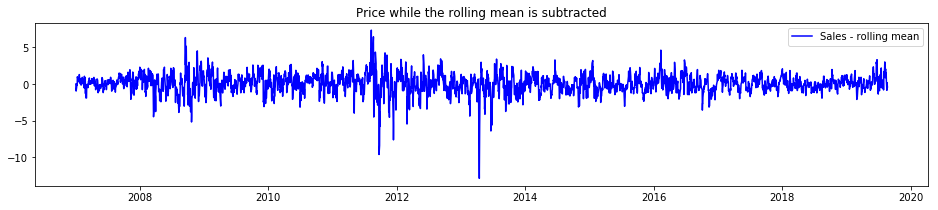

In [6]:
exp_rolmean = financial_data['Close'].ewm(halflife = 2).mean()
data_minus_exp_rolmean = financial_data['Close'] - exp_rolmean


fig = plt.figure(figsize=(16,3))
plt.plot(data_minus_exp_rolmean, color='blue',label='Sales - rolling mean')
plt.legend(loc='best')
plt.title('Price while the rolling mean is subtracted')
plt.show(block=False)


## Differentiating

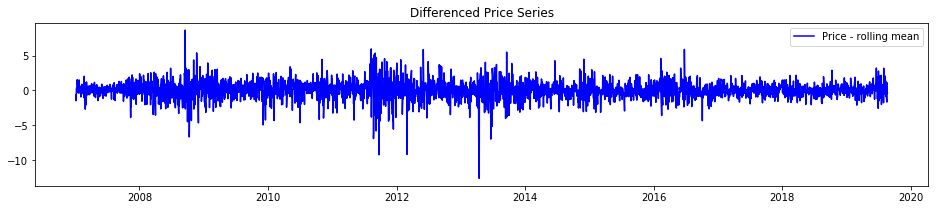

In [7]:
data_diff = financial_data['Close'].diff(periods=1)
data_diff.head(10)

fig = plt.figure(figsize=(16,3))
plt.plot(data_diff, color='blue',label='Price - rolling mean')
plt.legend(loc='best')
plt.title('Differenced Price Series')
plt.show(block=False)


## RSI - Relative Strength Index

In [8]:
def RSI(df,col):
    
    values=df[col]

    RSI=[0]*14


    up, down = [],[]

    for i in range(0,14):
        if values[i+1]> values[i]:
            high=values[i+1]-values[i]
            up.append(high)
        elif values[i+1]< values[i]:
            low=values[i]-values[i+1]
            down.append(low) 
    
    avup = sum(up)/14
    avdown= sum(down)/14+0.00000000000000001
    RS = avup/avdown
    rsi= 100 - (100/(1+RS))
    
    RSI.append(rsi)

    for row in range(15,len(values)):
        if values[row]>values[row-1]:
            high=values[row]-values[row-1]
            avup=(avup*13+high)/14
            avdown=avdown*13/14
            RS = avup/avdown
            rsi= 100 - (100/(1+RS))
            RSI.append(rsi)
            
        else:
            low=values[row-1]-values[row]
            avup=(avup*13)/14
            avdown=(avdown*13+low)/14
            RS = avup/avdown
            rsi= 100 - (100/(1+RS))
            RSI.append(rsi)
        
    df['RSI']=RSI  
    


In [9]:
RSI(financial_data,'Close')
financial_data = financial_data[financial_data.RSI!=0]

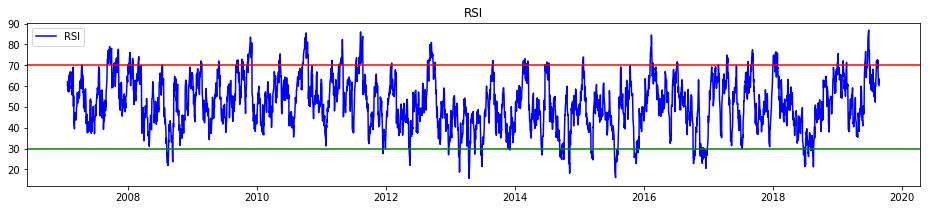

In [10]:
fig = plt.figure(figsize=(16,3))
plt.plot(financial_data['RSI'], color='blue',label='RSI')
plt.legend(loc='best')
plt.axhline(y=30, color='g', linestyle='-')
plt.axhline(y=70, color='r', linestyle='-')
plt.title('RSI')
plt.show(block=False)

## The Dickey Fuller Test

In [11]:


dftest = adfuller(financial_data['Close'])

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
#print(dftest)
print ('Results of Dickey-Fuller Test:')
print(dfoutput)


Results of Dickey-Fuller Test:
Test Statistic                   -2.097616
p-value                           0.245474
#Lags Used                        0.000000
Number of Observations Used    3167.000000
Critical Value (1%)              -3.432417
Critical Value (5%)              -2.862453
Critical Value (10%)             -2.567256
dtype: float64


## Features Correlations

In [12]:
corr = financial_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,High,Low,Open,Close,Volume,Adj Close,RSI
High,1,0.999427,0.999686,0.999666,0.138666,0.999666,0.0208279
Low,0.999427,1,0.999601,0.999687,0.114875,0.999687,0.0203154
Open,0.999686,0.999601,1,0.99937,0.129311,0.99937,0.0168731
Close,0.999666,0.999687,0.99937,1,0.125629,1,0.0247902
Volume,0.138666,0.114875,0.129311,0.125629,1,0.125629,0.153961
Adj Close,0.999666,0.999687,0.99937,1,0.125629,1,0.0247902
RSI,0.0208279,0.0203154,0.0168731,0.0247902,0.153961,0.0247902,1


In [13]:
corr = financial_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,High,Low,Open,Close,Volume,Adj Close,RSI
High,1,0.999427,0.999686,0.999666,0.138666,0.999666,0.0208279
Low,0.999427,1,0.999601,0.999687,0.114875,0.999687,0.0203154
Open,0.999686,0.999601,1,0.99937,0.129311,0.99937,0.0168731
Close,0.999666,0.999687,0.99937,1,0.125629,1,0.0247902
Volume,0.138666,0.114875,0.129311,0.125629,1,0.125629,0.153961
Adj Close,0.999666,0.999687,0.99937,1,0.125629,1,0.0247902
RSI,0.0208279,0.0203154,0.0168731,0.0247902,0.153961,0.0247902,1


In [14]:
financial_data.head()

,High,Low,Open,Close,Volume,Adj Close,RSI
Date,,,,,,,
2007-01-24,64.410004,63.369999,63.709999,64.330002,5241200,64.330002,62.044679
2007-01-25,64.879997,63.980000,64.800003,64.059998,5985700,64.059998,59.994748
2007-01-26,64.309998,63.759998,64.160004,64.169998,3493900,64.169998,60.566372
2007-01-29,64.290001,63.660000,63.849998,63.770000,3487300,63.770000,57.356951
2007-01-30,64.230003,63.830002,63.919998,64.220001,3094200,64.220001,59.929481


## Adding Suffixes

In [15]:
new_cols=[]
for c in list(financial_data.columns):
    updated = c+'_'+ticker
    new_cols.append(updated)
financial_data.columns=new_cols

In [16]:
financial_data.head()

,High_GLD,Low_GLD,Open_GLD,Close_GLD,Volume_GLD,Adj Close_GLD,RSI_GLD
Date,,,,,,,
2007-01-24,64.410004,63.369999,63.709999,64.330002,5241200,64.330002,62.044679
2007-01-25,64.879997,63.980000,64.800003,64.059998,5985700,64.059998,59.994748
2007-01-26,64.309998,63.759998,64.160004,64.169998,3493900,64.169998,60.566372
2007-01-29,64.290001,63.660000,63.849998,63.770000,3487300,63.770000,57.356951
2007-01-30,64.230003,63.830002,63.919998,64.220001,3094200,64.220001,59.929481


## Saving into final data csv file

In [17]:
#loading combined dataframe 
final_data=pd.read_csv('final_data.csv')
final_data=final_data.set_index('Date', drop=True)

In [18]:
#merging
final_data=final_data.merge(financial_data, left_index=True, right_index=True)

In [19]:
#checking
print(len(final_data))
final_data.head()

2754


,newsSentiment,Bullish,Neutral,Bearish,Bullish 8-Week Mov Avg,Bull-Bear Spread,Bullish Average,Bullish Average + St. Dev,Bullish Average - St. Dev,High_DBC,...,Volume_FXI,Adj Close_FXI,RSI_FXI,High_GLD,Low_GLD,Open_GLD,Close_GLD,Volume_GLD,Adj Close_GLD,RSI_GLD
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-24,0.42,0.5778,0.1515,0.2727,0.446163,0.3051,0.384907,0.488293,0.281522,23.629999,...,5589000.0,28.472500,41.318401,64.410004,63.369999,63.709999,64.330002,5241200,64.330002,62.044679
2007-01-25,0.39,0.3951,0.2716,0.3333,0.445275,0.0618,0.384907,0.488293,0.281522,23.700001,...,10604100.0,26.965136,34.855997,64.879997,63.980000,64.800003,64.059998,5985700,64.059998,59.994748
2007-01-26,-0.31,0.3951,0.2716,0.3333,0.445275,0.0618,0.384907,0.488293,0.281522,23.600000,...,8184000.0,27.184158,36.412262,64.309998,63.759998,64.160004,64.169998,3493900,64.169998,60.566372
2007-01-29,0.17,0.3951,0.2716,0.3333,0.445275,0.0618,0.384907,0.488293,0.281522,23.450001,...,8282100.0,26.694576,34.432157,64.290001,63.660000,63.849998,63.770000,3487300,63.770000,57.356951
2007-01-30,0.47,0.3951,0.2716,0.3333,0.445275,0.0618,0.384907,0.488293,0.281522,23.750000,...,6659400.0,27.506237,40.234773,64.230003,63.830002,63.919998,64.220001,3094200,64.220001,59.929481


In [20]:
#saving
final_data.to_csv('final_data.csv')